# Automated Brain Tumor Classification from MRI Scans: A Deep Learning and Transfer Learning Approach

**IMPORT LIBRARIES**

In [ ]:
import os
import shutil
import random
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Lambda, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
# download dataset
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

# unzip dataset
!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

# VGG 16

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [ ]:
IMAGE_SIZE = [224,224,3]

train_path = "content/Training"
test_path = "content/Testing"

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG 16
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape = IMAGE_SIZE , weights='imagenet', include_top=False)


58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes in order to kno how many output to expect
folders = glob('/content/Training/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction) #create a model with vgg16 as input and output as prediction

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# compile model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5712 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/Testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1311 images belonging to 4 classes.


In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
179/179 [==============================] - 108s 553ms/step - loss: 0.5551 - accuracy: 0.7950 - val_loss: 0.3769 - val_accuracy: 0.8658
Epoch 2/10
179/179 [==============================] - 84s 467ms/step - loss: 0.3257 - accuracy: 0.8839 - val_loss: 0.4082 - val_accuracy: 0.8604
Epoch 3/10
179/179 [==============================] - 82s 459ms/step - loss: 0.2469 - accuracy: 0.9107 - val_loss: 0.2518 - val_accuracy: 0.9092
Epoch 4/10
179/179 [==============================] - 81s 453ms/step - loss: 0.1831 - accuracy: 0.9350 - val_loss: 0.4097 - val_accuracy: 0.8703
Epoch 5/10
179/179 [==============================] - 82s 457ms/step - loss: 0.1864 - accuracy: 0.9315 - val_loss: 0.1718 - val_accuracy: 0.9405
Epoch 6/10
179/179 [==============================] - 82s 458ms/step - loss: 0.1489 - accuracy: 0.9470 - val_loss: 0.2107 - val_accuracy: 0.9169
Epoch 7/10
179/179 [==============================] - 81s 453ms/step - loss: 0.1392 - accuracy: 0.9480 - val_loss: 0.1824 - val_a

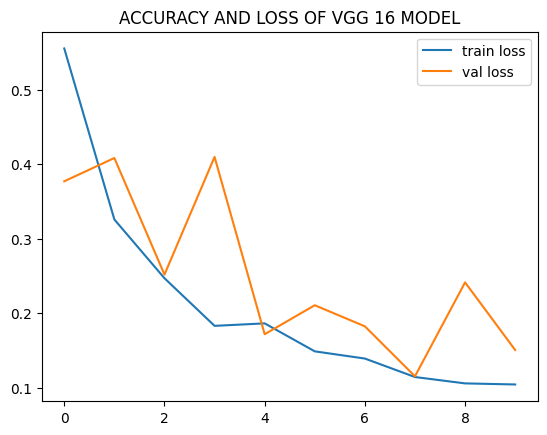

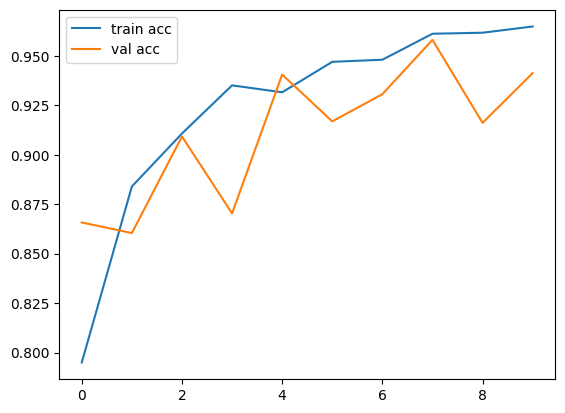

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.title("ACCURACY AND LOSS OF VGG 16 MODEL")

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from keras.models import load_model
model.save('model_vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# VGG 19

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

In [ ]:
IMAGE_SIZE = [200,200,3]

train_path = "content/Training"
test_path = "content/Testing"

In [ ]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG 19
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape = IMAGE_SIZE , weights='imagenet', include_top=False)


In [ ]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes in order to kno how many output to expect
folders = glob('/content/Training/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction) #create a model with vgg19 as input and output as prediction

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Training',
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5712 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/Testing',
                                            target_size = (200, 200),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1311 images belonging to 4 classes.


In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
179/179 [==============================] - 96s 502ms/step - loss: 0.6124 - accuracy: 0.7577 - val_loss: 0.4277 - val_accuracy: 0.8246
Epoch 2/10
179/179 [==============================] - 71s 394ms/step - loss: 0.3519 - accuracy: 0.8683 - val_loss: 0.3380 - val_accuracy: 0.8772
Epoch 3/10
179/179 [==============================] - 70s 392ms/step - loss: 0.3097 - accuracy: 0.8853 - val_loss: 0.4205 - val_accuracy: 0.8406
Epoch 4/10
179/179 [==============================] - 70s 390ms/step - loss: 0.2594 - accuracy: 0.9037 - val_loss: 0.3532 - val_accuracy: 0.8650
Epoch 5/10
179/179 [==============================] - 70s 392ms/step - loss: 0.2403 - accuracy: 0.9100 - val_loss: 0.3604 - val_accuracy: 0.8574
Epoch 6/10
179/179 [==============================] - 76s 423ms/step - loss: 0.2326 - accuracy: 0.9121 - val_loss: 0.3167 - val_accuracy: 0.8848
Epoch 7/10
179/179 [==============================] - 76s 421ms/step - loss: 0.1874 - accuracy: 0.9336 - val_loss: 0.2516 - val_ac

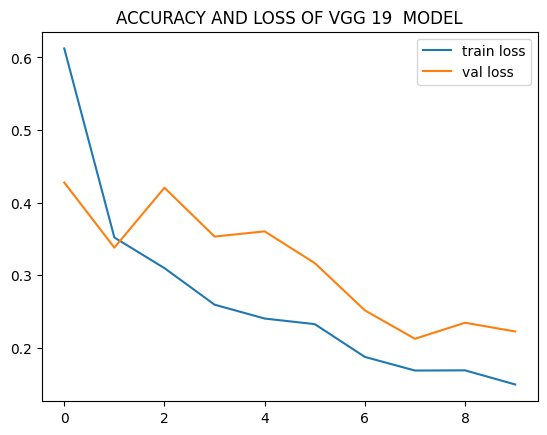

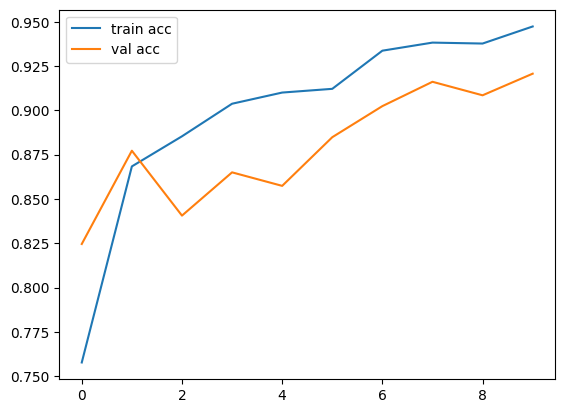

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.title("ACCURACY AND LOSS OF VGG 19  MODEL")

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from keras.models import load_model
model.save('model_vgg19.h5')

# RESNET 50

In [ ]:
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input

In [ ]:
IMAGE_SIZE = [224,224,3]

train_path = "content/Training"
test_path = "content/Testing"

In [ ]:
# Import the Resnet 50  library as shown below and add preprocessing layer to the front of Resnet 50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape = IMAGE_SIZE , weights='imagenet', include_top=False)


94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes in order to kno how many output to expect
folders = glob('/content/Training/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction) #create a model with resnet as input and output as prediction

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
# compile model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5712 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/Testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1311 images belonging to 4 classes.


In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
179/179 [==============================] - 89s 463ms/step - loss: 1.6655 - accuracy: 0.5748 - val_loss: 1.0331 - val_accuracy: 0.6430
Epoch 2/10
179/179 [==============================] - 81s 450ms/step - loss: 1.0773 - accuracy: 0.6390 - val_loss: 1.1439 - val_accuracy: 0.6346
Epoch 3/10
179/179 [==============================] - 82s 457ms/step - loss: 0.9630 - accuracy: 0.6686 - val_loss: 2.4100 - val_accuracy: 0.4638
Epoch 4/10
179/179 [==============================] - 80s 449ms/step - loss: 0.9074 - accuracy: 0.6852 - val_loss: 0.9667 - val_accuracy: 0.7262
Epoch 5/10
179/179 [==============================] - 80s 449ms/step - loss: 1.0277 - accuracy: 0.6759 - val_loss: 1.0067 - val_accuracy: 0.6895
Epoch 6/10
179/179 [==============================] - 80s 444ms/step - loss: 0.8045 - accuracy: 0.7132 - val_loss: 0.7997 - val_accuracy: 0.7628
Epoch 7/10
179/179 [==============================] - 82s 460ms/step - loss: 0.7099 - accuracy: 0.7404 - val_loss: 1.1737 - val_ac

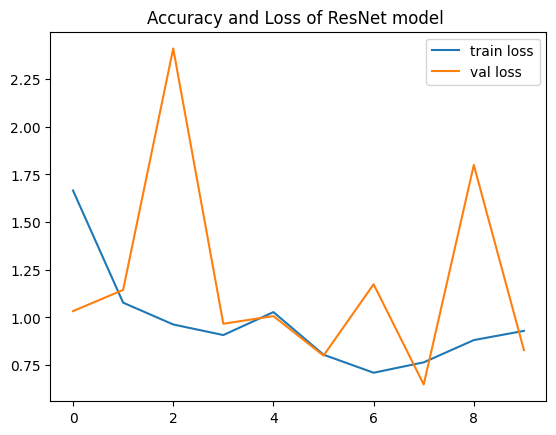

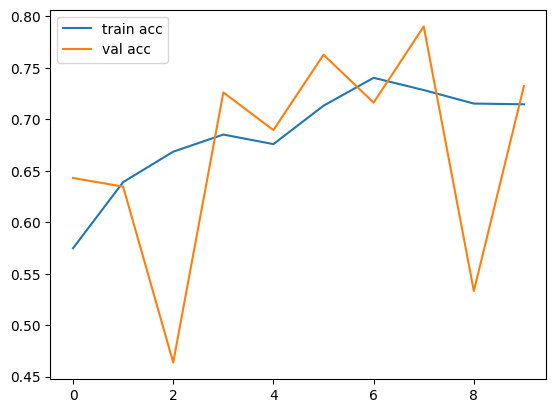

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.title("Accuracy and Loss of ResNet model ")
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from keras.models import load_model
model.save('model_resnet.h5')

# INCEPTION

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

In [ ]:
IMAGE_SIZE = [299,299,3]

train_path = "content/Training"
test_path = "content/Testing"

In [ ]:
# Import the Inception library as shown below and add preprocessing layer to the front of Inception
# Here we will be using imagenet weights

inception = InceptionV3(input_shape = IMAGE_SIZE , weights='imagenet', include_top=False)


87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes in order to kno how many output to expect
folders = glob('/content/Training/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction) #create a model with inception as input and output as prediction

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0]

In [ ]:
# compile model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Training',
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5712 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/Testing',
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1311 images belonging to 4 classes.


In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
179/179 [==============================] - 147s 765ms/step - loss: 2.8962 - accuracy: 0.8183 - val_loss: 3.1713 - val_accuracy: 0.8070
Epoch 2/10
179/179 [==============================] - 130s 727ms/step - loss: 1.5834 - accuracy: 0.8909 - val_loss: 2.2795 - val_accuracy: 0.8688
Epoch 3/10
179/179 [==============================] - 132s 739ms/step - loss: 1.3620 - accuracy: 0.9128 - val_loss: 1.6680 - val_accuracy: 0.9169
Epoch 4/10
179/179 [==============================] - 131s 733ms/step - loss: 0.8987 - accuracy: 0.9356 - val_loss: 1.9854 - val_accuracy: 0.9039
Epoch 5/10
179/179 [==============================] - 132s 738ms/step - loss: 0.8457 - accuracy: 0.9417 - val_loss: 1.9291 - val_accuracy: 0.8986
Epoch 6/10
179/179 [==============================] - 129s 723ms/step - loss: 0.9145 - accuracy: 0.9415 - val_loss: 1.2743 - val_accuracy: 0.9100
Epoch 7/10
179/179 [==============================] - 132s 736ms/step - loss: 1.0176 - accuracy: 0.9394 - val_loss: 1.0302 -

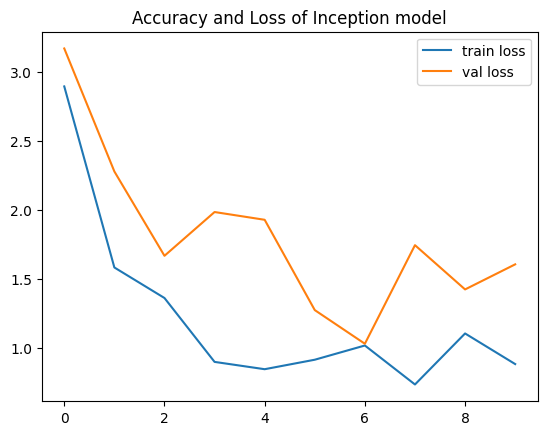

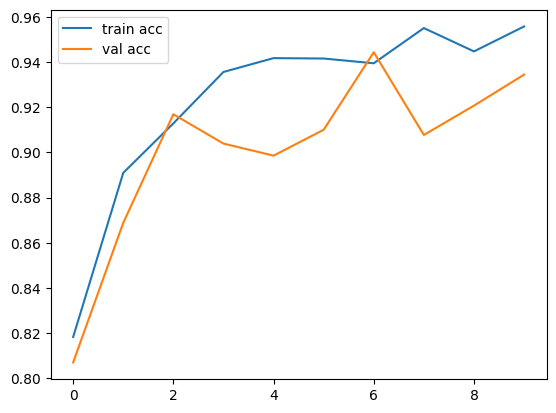

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.title("Accuracy and Loss of Inception model")
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from keras.models import load_model
model.save('model_inception.h5')

# Xception

In [ ]:
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input

In [ ]:
IMAGE_SIZE = [299,299,3]

train_path = "content/Training"
test_path = "content/Testing"

In [ ]:
# Import the Xception library as shown below and add preprocessing layer to the front of Xception
# Here we will be using imagenet weights

xception= Xception(input_shape = IMAGE_SIZE , weights='imagenet', include_top=False)


83683744/83683744 [==============================] - 3s 0us/step


In [ ]:
# don't train existing weights
for layer in xception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes in order to kno how many output to expect
folders = glob('/content/Training/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(xception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=xception.input, outputs=prediction) #create a model with xception as input and output as prediction

In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_6[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]'

In [ ]:
# compile model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Training',
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5712 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/Testing',
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1311 images belonging to 4 classes.


In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
179/179 [==============================] - 157s 829ms/step - loss: 1.8712 - accuracy: 0.8326 - val_loss: 1.2782 - val_accuracy: 0.8871
Epoch 2/10
179/179 [==============================] - 142s 792ms/step - loss: 1.1471 - accuracy: 0.8958 - val_loss: 1.5532 - val_accuracy: 0.8650
Epoch 3/10
179/179 [==============================] - 141s 787ms/step - loss: 0.9272 - accuracy: 0.9251 - val_loss: 0.5586 - val_accuracy: 0.9382
Epoch 4/10
179/179 [==============================] - 139s 778ms/step - loss: 0.9126 - accuracy: 0.9263 - val_loss: 0.7504 - val_accuracy: 0.9420
Epoch 5/10
179/179 [==============================] - 143s 796ms/step - loss: 0.6902 - accuracy: 0.9442 - val_loss: 0.5834 - val_accuracy: 0.9542
Epoch 6/10
179/179 [==============================] - 141s 786ms/step - loss: 0.6748 - accuracy: 0.9456 - val_loss: 0.6399 - val_accuracy: 0.9497
Epoch 7/10
179/179 [==============================] - 142s 794ms/step - loss: 0.6278 - accuracy: 0.9520 - val_loss: 0.8330 -

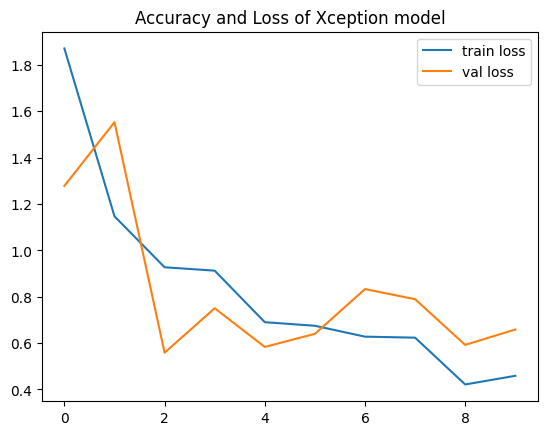

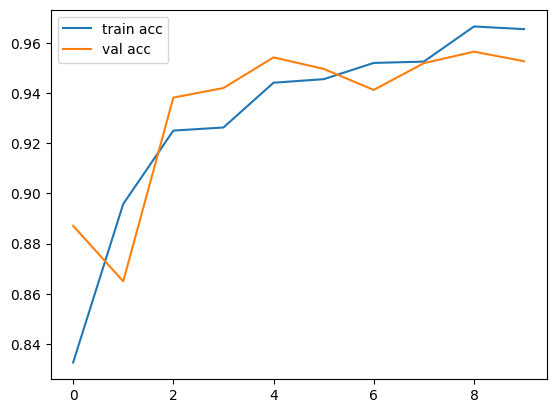

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.title("Accuracy and Loss of Xception model")
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from keras.models import load_model
model.save('model_xception.h5')

# DENSENET 121

In [ ]:
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input

In [ ]:
IMAGE_SIZE = [224,224,3]

train_path = "content/Training"
test_path = "content/Testing"

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

densenet = DenseNet121(input_shape = IMAGE_SIZE , weights='imagenet', include_top=False)


In [ ]:
# don't train existing weights
for layer in densenet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes in order to kno how many output to expect
folders = glob('/content/Training/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(densenet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=densenet.input, outputs=prediction) #create a model with densenet as input and output as prediction

In [ ]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 230, 230, 3)          0         ['input_8[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5712 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/Testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1311 images belonging to 4 classes.


In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
179/179 [==============================] - 100s 494ms/step - loss: 1.3441 - accuracy: 0.8255 - val_loss: 1.2931 - val_accuracy: 0.8413
Epoch 2/10
179/179 [==============================] - 82s 456ms/step - loss: 0.7225 - accuracy: 0.8941 - val_loss: 0.8314 - val_accuracy: 0.8841
Epoch 3/10
179/179 [==============================] - 80s 444ms/step - loss: 0.4841 - accuracy: 0.9291 - val_loss: 0.4324 - val_accuracy: 0.9237
Epoch 4/10
179/179 [==============================] - 79s 444ms/step - loss: 0.5064 - accuracy: 0.9266 - val_loss: 0.6736 - val_accuracy: 0.9115
Epoch 5/10
179/179 [==============================] - 79s 443ms/step - loss: 0.4038 - accuracy: 0.9468 - val_loss: 0.6214 - val_accuracy: 0.9283
Epoch 6/10
179/179 [==============================] - 78s 437ms/step - loss: 0.5101 - accuracy: 0.9361 - val_loss: 0.5669 - val_accuracy: 0.9153
Epoch 7/10
179/179 [==============================] - 80s 444ms/step - loss: 0.3553 - accuracy: 0.9533 - val_loss: 2.0865 - val_a

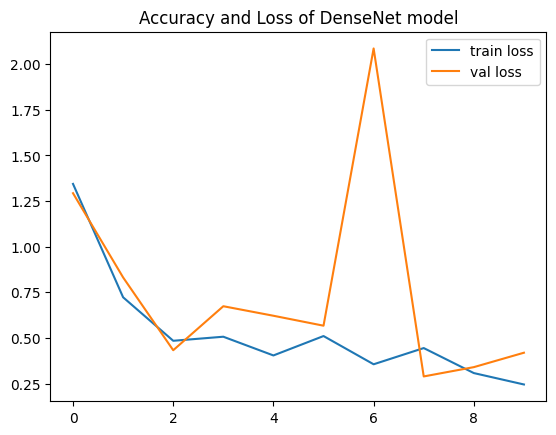

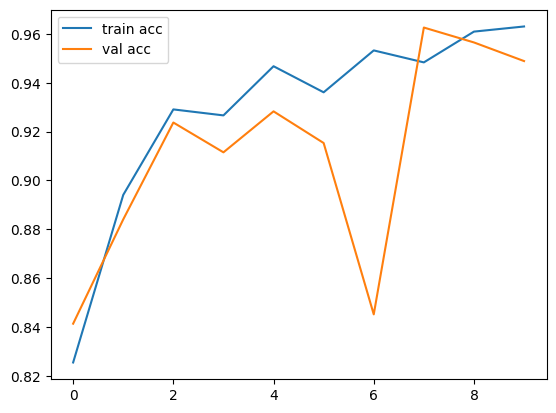

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.title("Accuracy and Loss of DenseNet model")

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from keras.models import load_model
model.save('model_densenet.h5')

#EFFICIENT NET

In [ ]:
from keras.applications.efficientnet import EfficientNetB0
from keras.applications.efficientnet import preprocess_input

In [ ]:
IMAGE_SIZE = [224,224,3]

train_path = "content/Training"
test_path = "content/Testing"

In [ ]:
# Import the Efficient Netlibrary as shown below and add preprocessing layer to the front of Inception
# Here we will be using imagenet weights

efficientnet= EfficientNetB0(input_shape = IMAGE_SIZE , weights='imagenet', include_top=False)


16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in efficientnet.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes in order to know how many output to expect
folders = glob('/content/Training/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(efficientnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=efficientnet.input, outputs=prediction) #create a model with efficientnet as input and output as prediction

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   

In [ ]:
# compile model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5712 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/Testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1311 images belonging to 4 classes.


In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
179/179 [==============================] - 653s 4s/step - loss: 2.4615 - accuracy: 0.2775 - val_loss: 1.6223 - val_accuracy: 0.4150
Epoch 2/10
179/179 [==============================] - 579s 3s/step - loss: 2.0161 - accuracy: 0.2887 - val_loss: 1.2889 - val_accuracy: 0.4378
Epoch 3/10
179/179 [==============================] - 583s 3s/step - loss: 1.7950 - accuracy: 0.3060 - val_loss: 2.0783 - val_accuracy: 0.2410
Epoch 4/10
179/179 [==============================] - 576s 3s/step - loss: 2.0127 - accuracy: 0.3093 - val_loss: 2.6149 - val_accuracy: 0.2304
Epoch 5/10
179/179 [==============================] - 627s 3s/step - loss: 1.8964 - accuracy: 0.3293 - val_loss: 2.1279 - val_accuracy: 0.2464
Epoch 6/10
179/179 [==============================] - 580s 3s/step - loss: 2.0169 - accuracy: 0.3165 - val_loss: 1.3622 - val_accuracy: 0.3181
Epoch 7/10
179/179 [==============================] - 626s 3s/step - loss: 1.7662 - accuracy: 0.3328 - val_loss: 1.2926 - val_accuracy: 0.4371

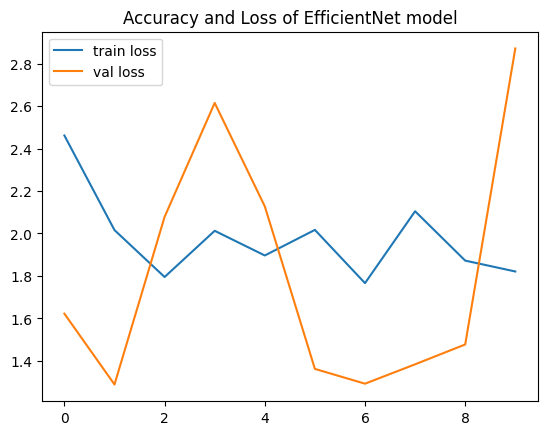

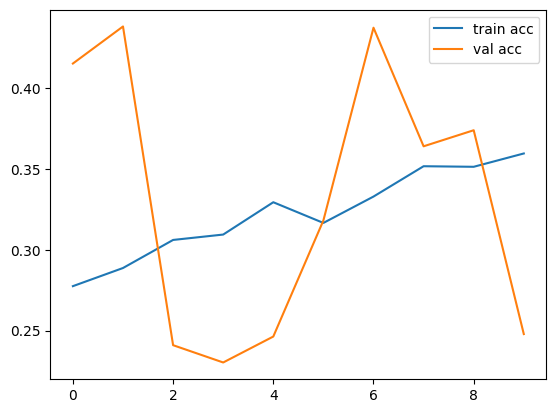

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.title("Accuracy and Loss of EfficientNet model")
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from keras.models import load_model
model.save('model_efficientnet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
